In [1]:
#!pip install openpyxl --upgrade
#!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('data/MRIPET_for_EDA.xlsx')

data.head(5)

,MRI_number,OASISID,OASIS_session_label,age at visit,gender,진단,정상인지 여부,인지감소여부,MCIAMEM,MCIAPLUS,...,sleepap,remdis,hyposom,sleepoth,angiocp,angiopci,pacemake,hvalve,antienc,othcond
0,OAS30001_MR_d0129,OAS30001,OAS30001_UDSd1_d0000,65.19,2,정상,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OAS30001_MR_d0757,OAS30001,OAS30001_UDSd1_d0722,67.17,2,정상,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OAS30001_MR_d2430,OAS30001,OAS30001_UDSd1_d2181,71.17,2,정상,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OAS30001_MR_d3132,OAS30001,OAS30001_UDSd1_d3025,73.48,2,정상,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OAS30001_MR_d3746,OAS30001,OAS30001_UDSd1_d3675,75.26,2,정상,1,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 1. 일반적인 진료 받는 기간 간격 확인 

In [4]:
# 한 환자의 방문 나이 확인 (for 나이 차이로 방문 간격 확인 하기 위해) 
data[data['OASISID']=='OAS30001']['age at visit'].unique() # unique() 해줘야하는 이유 : 하루에 여러장 찍었을 수 있음

array([65.19, 67.17, 71.17, 73.48, 75.26, 77.11])

In [5]:
# 고유 환자 ID 
data['OASISID'].unique()

array(['OAS30001', 'OAS30002', 'OAS30003', ..., 'OAS31472', 'OAS31473',
       'OAS31474'], dtype=object)

In [6]:
# 환자수 확인  
len(data['OASISID'].unique())

1078

In [7]:
oasis_id = []
visitgap = []
visitgap_mean_p0 = []
visitgap_mean_p2 = []

for id in data['OASISID'].unique():
    agelist = data[data['OASISID']==id]['age at visit'].unique().tolist()
    if len(agelist)>1: # 한 번만 방문한 사람은 계산할 필요 X 
        gap = [ agelist[i] - agelist[i-1] for i in range(1,len(agelist)) ] 
        oasis_id.append(id)
        visitgap.append(gap)
        visitgap_mean_p0.append(np.around(np.mean(gap))) # 그래프 시각화를 위해, 일의 자리까지 반올림 
        visitgap_mean_p2.append(np.around(np.mean(gap),2)) # 구체적인 수치값을 확인 하기위해, 소수점 2번째 자리까지 반올림 
    
values = {"OASISID":oasis_id, "방문간격":visitgap, "방문기간평균":visitgap_mean_p2}  
df = pd.DataFrame(values)
df.head(10)      

,OASISID,방문간격,방문기간평균
0,OAS30001,"[1.980000000000004, 4.0, 2.3100000000000023, 1...",2.38
1,OAS30002,"[2.0600000000000023, 3.009999999999991, 1.1300...",2.07
2,OAS30003,"[4.239999999999995, 1.7999999999999972, 4.4200...",3.49
3,OAS30004,"[3.0900000000000034, 3.3699999999999974, 3.400...",3.29
4,OAS30005,"[3.269999999999996, 3.0700000000000003, 2.7700...",3.02
5,OAS30006,"[4.020000000000003, 2.1899999999999977, 5.7099...",3.97
6,OAS30007,[5.299999999999997],5.30
7,OAS30008,"[2.740000000000002, 3.0]",2.87
8,OAS30010,[3.260000000000005],3.26
9,OAS30014,[2.0],2.00


In [8]:
# 방문기간평균 값의 범위(최소,평균,최대) 확인 
df['방문기간평균'].describe()

count    431.000000
mean       3.387030
std        1.544296
min        0.970000
25%        2.520000
50%        3.070000
75%        3.810000
max       12.630000
Name: 방문기간평균, dtype: float64

결과를 보면 최소 11개월 최대 13년 정도의 간격을 두고 검사를 진행하며,      
       
절반(25~75%)의 인원은 2년~4년 사이 간격으로 가지고,     
       
평균적으로 4년의 간격을 가진다.(평균이 높은 이유는 최대값의 크기가 크기 때문으로 보임)

In [9]:
values = {"OASISID":oasis_id, "방문간격":visitgap, "방문기간평균":visitgap_mean_p0}  
df = pd.DataFrame(values)

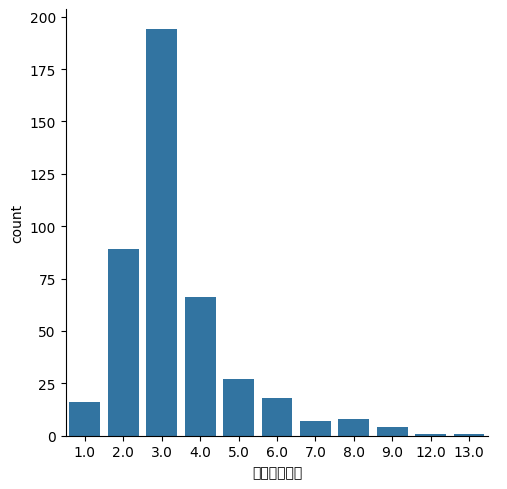

In [10]:
sns.catplot(x='방문기간평균', data=df, kind="count")
plt.show()

대부분은 3년을 간격으로 방문하며, 2~4년 사이 방문이 대부분임을 알 수 있다.